Het bestand "studentInfo.csv" bevat informatie over de in- en uitschrijfdatum van studenten. Wanneer een student nog niet uitgeschreven is, dan is de waarde van uitschrijfdatum None. De datums zijn in volgend formaat dd/mm/jjjj.

Lees het bestand in een panda dataframe.

In [51]:
import pandas as pd
from datetime import datetime
from IPython.display import display

data = pd.read_csv('studentInfo.csv', sep=';')
#data

Toon de eerste rijen om na te gaan of dit goed gelukt is.

In [52]:
data[0:3]

,studentnummer,inschrijfdatum,uitschrijfdatum
0,r012345,11/09/2023,NaN
1,r124589,10/05/2023,01/12/2022
2,r457899,10/10/2023,24/31/2024


Verwijder alle rijen met in de kolom "uitschrijfdatum" een niet geldige datum (ook None is uiteraard een niet geldige datum). 
Toon opnieuw de eerste rijen om na te gaan of dit goed gelukt is

In [53]:
def validate_date(date_str):
    try:
        if date_str == 'None' or pd.isna(date_str):
            return False
        datetime.strptime(date_str, '%d/%m/%Y')
        return True
    except ValueError:
        return False
display(data)
data['valid_uitschrijfdatum'] = data['uitschrijfdatum'].apply(validate_date)

#boalean indexing: zo gebeurt de filtering en dan pas de hele colum droppen
cleaned_data = data[data['valid_uitschrijfdatum']].drop(columns=['valid_uitschrijfdatum'])
data = cleaned_data
display(data)

,studentnummer,inschrijfdatum,uitschrijfdatum
0,r012345,11/09/2023,NaN
1,r124589,10/05/2023,01/12/2022
2,r457899,10/10/2023,24/31/2024
3,r012345,11/09/2023,22/12/2023
4,r024589,10/18/2023,100/12/2023
5,r957899,10/10/2023,NaN
6,r112345,21/09/2023,01/01/2024
7,r124589,10/08/2023,01/12/2023
8,r457899,10/10/2023,24/01/2024
9,r012345,11/09/2023,22/12/2023


,studentnummer,inschrijfdatum,uitschrijfdatum
1,r124589,10/05/2023,01/12/2022
3,r012345,11/09/2023,22/12/2023
6,r112345,21/09/2023,01/01/2024
7,r124589,10/08/2023,01/12/2023
8,r457899,10/10/2023,24/01/2024
9,r012345,11/09/2023,22/12/2023
10,r024589,15/08/2023,01/12/2023
11,r957899,10/10/2023,24/01/2024


Verwijder alle rijen  met een niet geldige datum in de kolom "inschrijfdatum" .

In [54]:
#from datetime import datetime
#from IPython.display import display
def validate_date(date_str):
    try:
        if date_str == 'None' or pd.isna(date_str):
            return False
        datetime.strptime(date_str, '%d/%m/%Y')
        return True
    except ValueError:
        return False
display(data)
data['valid_inschrijfdatum'] = data['inschrijfdatum'].apply(validate_date)

#boalean indexing: zo gebeurt de filtering en dan pas de hele colum droppen
cleaned_data = data[data['valid_inschrijfdatum']].drop(columns=['valid_inschrijfdatum'])
data = cleaned_data
display(data)

,studentnummer,inschrijfdatum,uitschrijfdatum
1,r124589,10/05/2023,01/12/2022
3,r012345,11/09/2023,22/12/2023
6,r112345,21/09/2023,01/01/2024
7,r124589,10/08/2023,01/12/2023
8,r457899,10/10/2023,24/01/2024
9,r012345,11/09/2023,22/12/2023
10,r024589,15/08/2023,01/12/2023
11,r957899,10/10/2023,24/01/2024


,studentnummer,inschrijfdatum,uitschrijfdatum
1,r124589,10/05/2023,01/12/2022
3,r012345,11/09/2023,22/12/2023
6,r112345,21/09/2023,01/01/2024
7,r124589,10/08/2023,01/12/2023
8,r457899,10/10/2023,24/01/2024
9,r012345,11/09/2023,22/12/2023
10,r024589,15/08/2023,01/12/2023
11,r957899,10/10/2023,24/01/2024


Maak een nieuwe kolom "aantal dagen" dat het aantal dagen tussen in- en uitschrijfdatum bevat.

In [55]:
display(data)
data['inschrijfdatum_temp'] = pd.to_datetime(data['inschrijfdatum'], format='%d/%m/%Y')
data['uitschrijfdatum_temp'] = pd.to_datetime(data['uitschrijfdatum'], format='%d/%m/%Y')

data['aantal dagen'] = (data['uitschrijfdatum_temp'] - data['inschrijfdatum_temp']).dt.days

data = data.drop(columns=[ 'inschrijfdatum_temp', 'uitschrijfdatum_temp'])

data

,studentnummer,inschrijfdatum,uitschrijfdatum
1,r124589,10/05/2023,01/12/2022
3,r012345,11/09/2023,22/12/2023
6,r112345,21/09/2023,01/01/2024
7,r124589,10/08/2023,01/12/2023
8,r457899,10/10/2023,24/01/2024
9,r012345,11/09/2023,22/12/2023
10,r024589,15/08/2023,01/12/2023
11,r957899,10/10/2023,24/01/2024


,studentnummer,inschrijfdatum,uitschrijfdatum,aantal dagen
1,r124589,10/05/2023,01/12/2022,-160
3,r012345,11/09/2023,22/12/2023,102
6,r112345,21/09/2023,01/01/2024,102
7,r124589,10/08/2023,01/12/2023,113
8,r457899,10/10/2023,24/01/2024,106
9,r012345,11/09/2023,22/12/2023,102
10,r024589,15/08/2023,01/12/2023,108
11,r957899,10/10/2023,24/01/2024,106


Verwijder alle rijen waarvoor de kolom "aantal dagen" een negatieve waarde heeft.

In [56]:
def dag_onder_nul(dag: int) -> bool:
    return dag>=0

display(data)
#de () worden automatisch aangevuld
data['valid_dagen'] = data['aantal dagen'].apply(dag_onder_nul)
data = data[data['valid_dagen']].drop(columns='valid_dagen')
data

,studentnummer,inschrijfdatum,uitschrijfdatum,aantal dagen
1,r124589,10/05/2023,01/12/2022,-160
3,r012345,11/09/2023,22/12/2023,102
6,r112345,21/09/2023,01/01/2024,102
7,r124589,10/08/2023,01/12/2023,113
8,r457899,10/10/2023,24/01/2024,106
9,r012345,11/09/2023,22/12/2023,102
10,r024589,15/08/2023,01/12/2023,108
11,r957899,10/10/2023,24/01/2024,106


,studentnummer,inschrijfdatum,uitschrijfdatum,aantal dagen
3,r012345,11/09/2023,22/12/2023,102
6,r112345,21/09/2023,01/01/2024,102
7,r124589,10/08/2023,01/12/2023,113
8,r457899,10/10/2023,24/01/2024,106
9,r012345,11/09/2023,22/12/2023,102
10,r024589,15/08/2023,01/12/2023,108
11,r957899,10/10/2023,24/01/2024,106


Geef een visueel overzicht in de vorm van een histogram van het aantal studenten dat eenzelfde aantal dagen is ingeschreven.
Voorbeeld: 

![output.png contains an image of the expected output. A histogram is shown with "aantal dagen ingeschreven" on the x-axis and "aantal studenten" on the y-axis.](output.png)

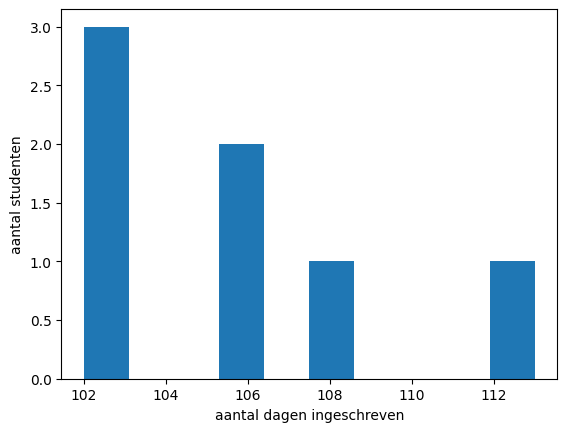

In [60]:
grafiek = data.plot(kind='hist', xlabel='aantal dagen ingeschreven', ylabel='aantal studenten', legend=False)